<div class="table-of-contents" style="background-color:#00EFFF; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#000000;">TOC</h1>
  <ol>
    <li><a href="#1" style="color: #000000;">1. Imports</a></li>
      <li><a href="#2" style="color: #000000;">2. Data Analysis</a></li>
    <li><a href="#3" style="color: #000000;">3. Data Preprocessing</a></li>
    <li><a href="#4" style="color: #000000;">4. Model</a></li>
    <li><a href="#5" style="color: #000000;">5. Evaluation</a></li> 
    <li><a href="#6" style="color: #000000;">6. Conclusion</a></li>
    <li><a href="#7" style="color: #000000;">7. Thank You</a></li>  
  </ol>
</div>

<a id="1"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Imports</center></h1>

# Imports
     

[](http://)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import plotly.express as px
import os
import itertools
import plotly.graph_objs as go


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import BatchNormalization,Dense,Conv2D,Input,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.optimizers import Adam

<a id="2"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>

# Data Analysis

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv') # read training dataframe
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv') # read test dataframe

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train.iloc[:,1:].values  # set training data
y = train.iloc[:,0].values # set training labels
X = X.reshape(42000,28,28) # reshape into a format that can be fed into our NN

In [5]:
counts = train['label'].value_counts().sort_values()

In [6]:
px.histogram(data_frame=train,x='label',color='label')

**Let's visualize some examples**

In [7]:
px.imshow(X[20],color_continuous_scale='ice')

In [8]:
px.imshow(X[44],color_continuous_scale='ice')

In [9]:
px.imshow(X[90],color_continuous_scale='ice')

<a id="3"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [10]:

X = X / 255 # normalize our training data


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) # split data into training and validation

In [12]:
# Now let's do the same preprocessing for our testing data
X_test  = test.iloc[:,0:].values
X_test = X_test / 255
X_test = X_test.reshape(28000,28,28)

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model</center></h1>

# Model

**Wel'll use a CNN model with some regularization**


**After trying different  network architectures this seemed to perform well**

In [13]:
inputs = Input((28,28,1))
              
x = Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu' , kernel_regularizer=tf.keras.regularizers.l2(0.0005))(inputs)
x = Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False,activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(strides = 2)(x)
x = Dropout(0.3)(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005))(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False,activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(strides = 2)(x)
x = Dropout(0.3)(x)
    
    
x = Flatten()(x)
x = Dense(units = 256, use_bias=False,activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(units = 128, use_bias=False,kernel_regularizer=l2(0.0005),activation='relu')(x)
x = BatchNormalization()(x)

x1 = Dense(units = 84, use_bias=False,kernel_regularizer=l2(0.0005),activation='relu')(x)
x = BatchNormalization()(x1)
x2 = Dropout(0.3)(x)
x = tf.keras.layers.Add()([x1,x2])

outputs = Dense(units = 10, activation = 'softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

2023-01-20 21:29:10.205445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 21:29:10.209134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 21:29:10.209921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 21:29:10.211759: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 20, 32)   25600       conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 20, 20, 32)   128         conv2d_1[0][0]                   
______________________________________________________________________________________________

**Now let's define a LearningRate scheduling function**

In [15]:
def scheduler(epoch, lr):
    
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

**Now let's compile the model using Adam optimizer and SparseCategoricalCrossentropy loss**

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer= tf.keras.optimizers.Adam(learning_rate=0.01))

**Now let's fit the model**

In [17]:
r = model.fit(X,y,epochs=50,callbacks=callback,validation_data=(X_valid, y_valid))

2023-01-20 21:29:13.296092: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-20 21:29:15.435034: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1313/1313 [==============================] - 16s 6ms/step - loss: 0.4963 - accuracy: 0.9108 - val_loss: 0.2578 - val_accuracy: 0.9630
Epoch 2/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2774 - accuracy: 0.9562 - val_loss: 0.1736 - val_accuracy: 0.9805
Epoch 3/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2670 - accuracy: 0.9607 - val_loss: 0.1841 - val_accuracy: 0.9768
Epoch 4/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2708 - accuracy: 0.9623 - val_loss: 0.1806 - val_accuracy: 0.9832
Epoch 5/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2340 - accuracy: 0.9670 - val_loss: 0.1831 - val_accuracy: 0.9786
Epoch 6/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2254 - accuracy: 0.9686 - val_loss: 0.1587 - val_accuracy: 0.9826
Epoch 7/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2074 - accuracy: 0.9714 - val_loss: 0.1465 - val_accuracy: 0.9848
Ep

In [18]:
results = pd.DataFrame(r.history)

In [19]:
results.tail()

,loss,accuracy,val_loss,val_accuracy,lr
45,0.022015,0.995929,0.010142,0.999643,0.000273
46,0.020549,0.996024,0.009947,0.999524,0.000247
47,0.021143,0.995762,0.009516,0.999405,0.000224
48,0.019825,0.996381,0.009354,0.999405,0.000202
49,0.020778,0.996071,0.009334,0.999405,0.000183


In [20]:
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="plotly_dark",color_discrete_sequence=['#7F00FF','#00bfff'])
fig.update_layout(   
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title='Epochs'), 
    yaxis=dict(color="#41BEE9")
 )
fig.show()

In [21]:
fig = px.line(results,y=[results['loss'],results['val_loss']],template="plotly_dark",color_discrete_sequence=['#7F00FF','#00bfff'])
fig.update_layout(   
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title='Epochs'), 
    yaxis=dict(color="#41BEE9")
 )
fig.show()

## View Confusion Matrix

In [22]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

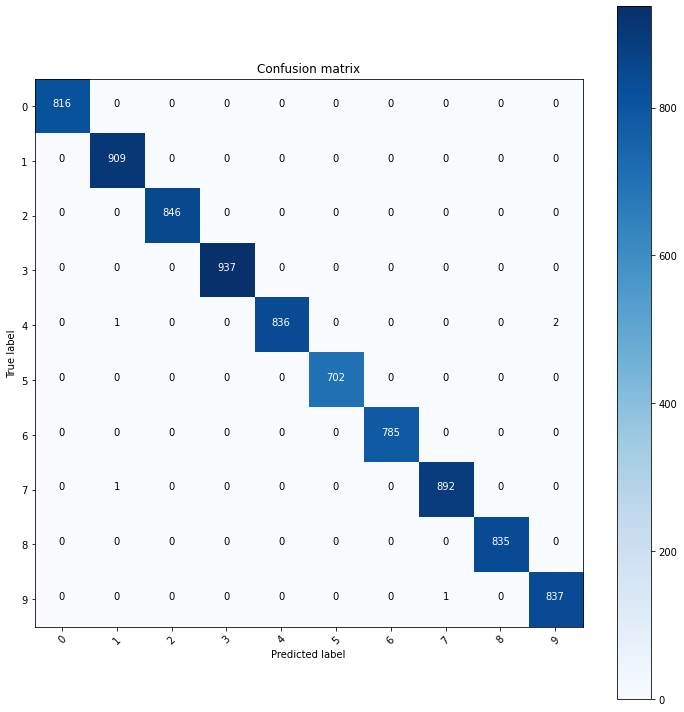

In [23]:
predictions = model.predict(X_valid)
predictions = np.argmax(predictions, axis=1)

# plot the confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix(y_valid, predictions), classes = range(10)) 
plt.show()

<a id="5"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>

# Evaluation

**Now let's evaluate our results on the test set and save it in submission dataframe** 

In [24]:
preds = model.predict(X_test) 

In [25]:
predictions = np.argmax(preds,axis=1)

In [26]:
submissions = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [27]:
submissions['Label'] = predictions

In [28]:
submissions.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [29]:
submissions.to_csv("submission.csv", index=False)

<a id="6"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Conclusion</center></h1>

# Conclusion
**We were able to achieve the following:**

**Train : 99.61 accuracy, validation : 99.94 accuracy, test : 99.471 accuracy**

<a id="7"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>

# Thank You

**Thank you for taking your time and reading this notebook**

**Please let me know if you have any feedback**